In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kruskal

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#reading the data
df=pd.read_csv(r"Video_Games.csv")

In [4]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

Name
False    16717
True         2
Name: count, dtype: int64 

Platform
False    16719
Name: count, dtype: int64 

Year_of_Release
False    16450
True       269
Name: count, dtype: int64 

Genre
False    16717
True         2
Name: count, dtype: int64 

Publisher
False    16665
True        54
Name: count, dtype: int64 

NA_Sales
False    16719
Name: count, dtype: int64 

EU_Sales
False    16719
Name: count, dtype: int64 

JP_Sales
False    16719
Name: count, dtype: int64 

Other_Sales
False    16719
Name: count, dtype: int64 

Global_Sales
False    16719
Name: count, dtype: int64 

Critic_Score
True     8582
False    8137
Name: count, dtype: int64 

Critic_Count
True     8582
False    8137
Name: count, dtype: int64 

User_Score
False    10015
True      6704
Name: count, dtype: int64 

User_Count
True     9129
False    7590
Name: count, dtype: int64 

Developer
False    10096
True      6623
Name: count, dtype: int64 

Rating
False    9950
True     6769
Name: count, dtype: int64 



In [6]:
#Critic count and Critic Score has almost 50% of the data missing. Chosing to remove those two columns and making inferences 
#based on user scores only. 
df = df.drop(columns=['Critic_Score', 'Critic_Count'])

In [7]:
# Dropping NA rows in table from attribute name, platform, year of release, Genre and Publisher

df = df.dropna(subset=['Name','Year_of_Release','Platform','Genre','Publisher'])

In [8]:
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

Name
False    16416
Name: count, dtype: int64 

Platform
False    16416
Name: count, dtype: int64 

Year_of_Release
False    16416
Name: count, dtype: int64 

Genre
False    16416
Name: count, dtype: int64 

Publisher
False    16416
Name: count, dtype: int64 

NA_Sales
False    16416
Name: count, dtype: int64 

EU_Sales
False    16416
Name: count, dtype: int64 

JP_Sales
False    16416
Name: count, dtype: int64 

Other_Sales
False    16416
Name: count, dtype: int64 

Global_Sales
False    16416
Name: count, dtype: int64 

User_Score
False    9837
True     6579
Name: count, dtype: int64 

User_Count
True     8955
False    7461
Name: count, dtype: int64 

Developer
False    9904
True     6512
Name: count, dtype: int64 

Rating
False    9767
True     6649
Name: count, dtype: int64 



In [9]:
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [11]:
df['User_Score'] = df['User_Score'].replace('tbd',np.nan) #replacing 'tbd' to NAN for conversion to float data type
df[119:120] # checking if worked

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,NaN,NaN,"Pipeworks Software, Inc.",E


In [12]:
df['User_Score'] = pd.to_numeric(df['User_Score'])
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


In [13]:
# 11397 video games that were exclusively released on a platform
print( df['Name'].duplicated().value_counts())

Name
False    11397
True      5019
Name: count, dtype: int64


<Axes: >

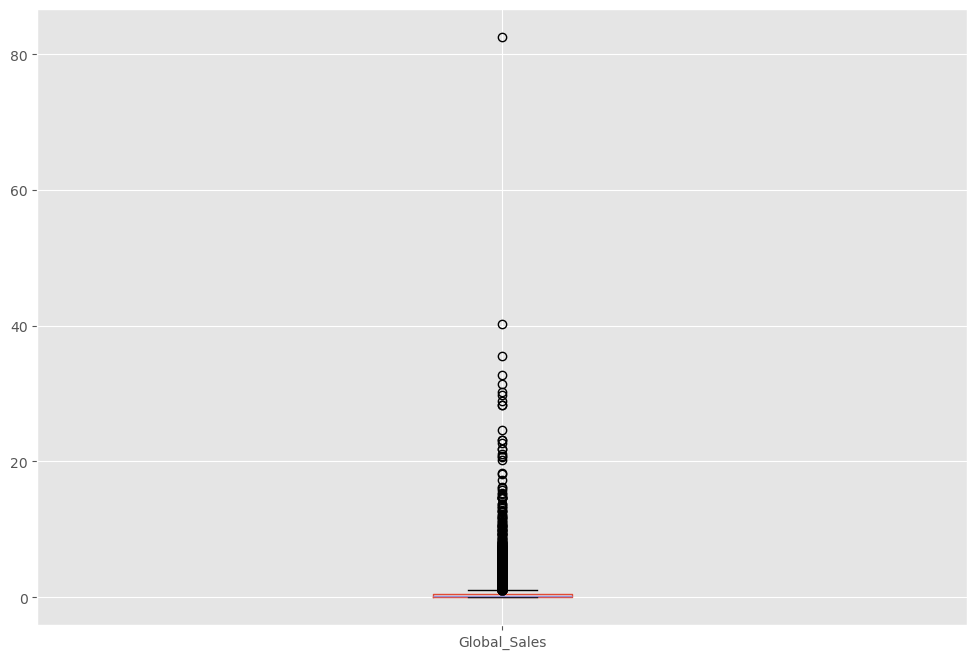

In [14]:
df.boxplot(column = 'Global_Sales') 

<Axes: >

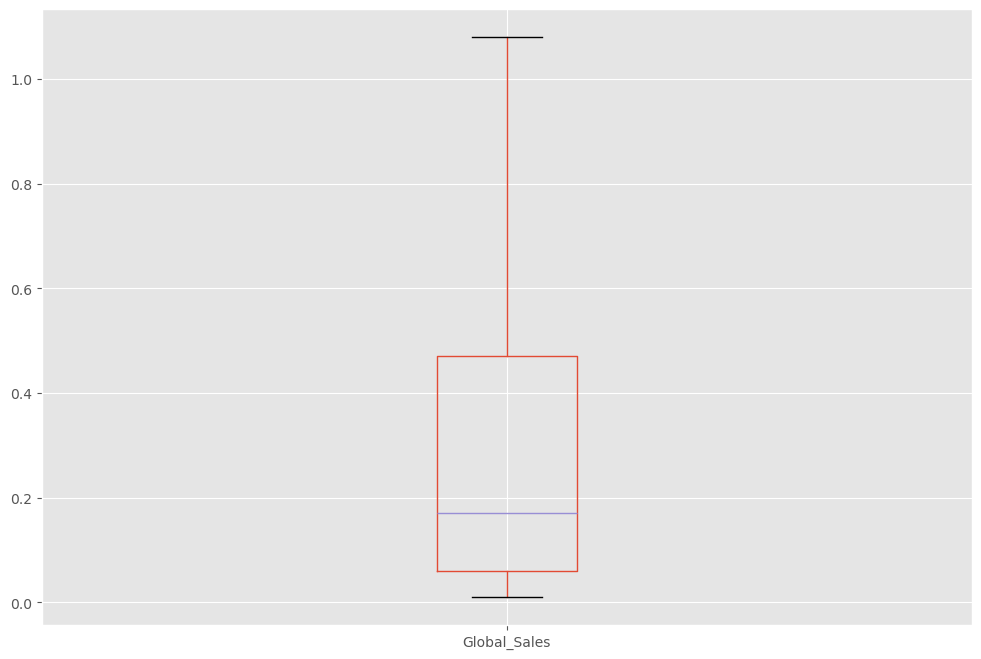

In [15]:
df.boxplot(column = 'Global_Sales',showfliers = False) #removing the outliers for better visualization

In [16]:
# Finding the most successful video game globally
print(df[df['Global_Sales'] == df['Global_Sales'].max()])

         Name Platform  Year_of_Release   Genre Publisher  NA_Sales  EU_Sales  \
0  Wii Sports      Wii           2006.0  Sports  Nintendo     41.36     28.96   

   JP_Sales  Other_Sales  Global_Sales  User_Score  User_Count Developer  \
0      3.77         8.45         82.53         8.0       322.0  Nintendo   

  Rating  
0      E  


In [17]:
#sorting by global sales in descending order
df.sort_values(by=['Global_Sales'], inplace=False, ascending=False)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,Simple 2000 Series Vol. 120: The Saigo no Nipp...,PS2,2007.0,Strategy,D3Publisher,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16295,Casper,GBA,2002.0,Adventure,Microids,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16297,Adventure Time: The Secret of the Nameless,X360,2014.0,Adventure,Little Orbit,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16298,Football Manager 2005,PC,2004.0,Sports,Sega,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Boxplot of Video Games with Global Sales Greater than 5 Million')

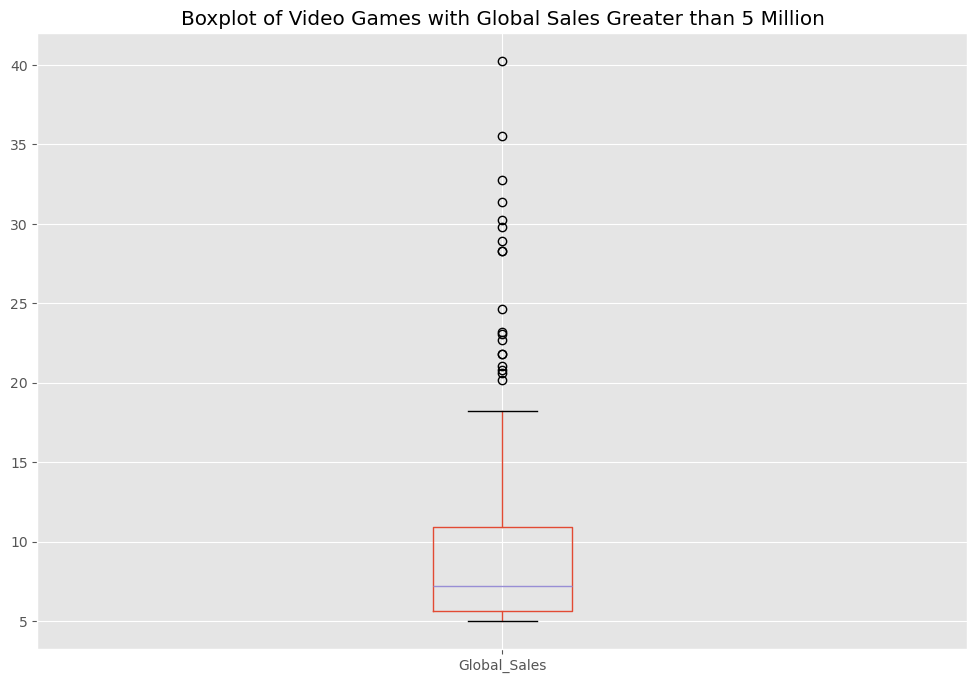

In [18]:
boxplot = df[df['Global_Sales'].between(5,80)].boxplot(column = 'Global_Sales')  # making a separate boxplot for movies that had more than 5 million sales
# The Wii Sports row was left out for better visualization
boxplot.set_title('Boxplot of Video Games with Global Sales Greater than 5 Million')

<Axes: xlabel='User_Score', ylabel='Global_Sales'>

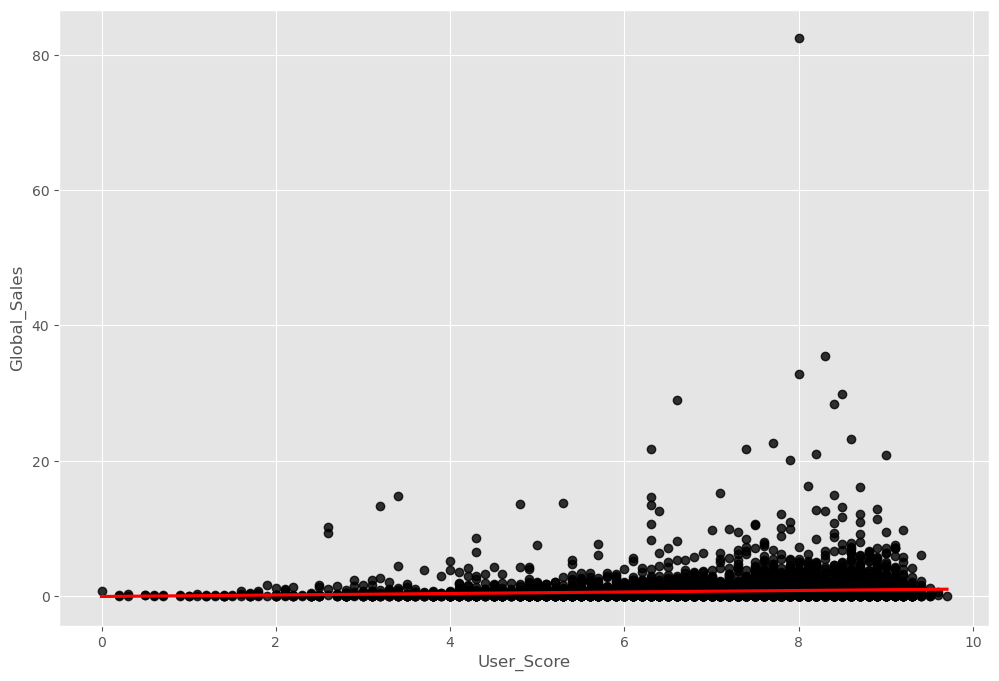

In [19]:
sns.regplot(x='User_Score', y='Global_Sales',data = df,scatter_kws={"color": "black"}, line_kws={"color": "red"}) 


<Axes: xlabel='User_Score', ylabel='Global_Sales'>

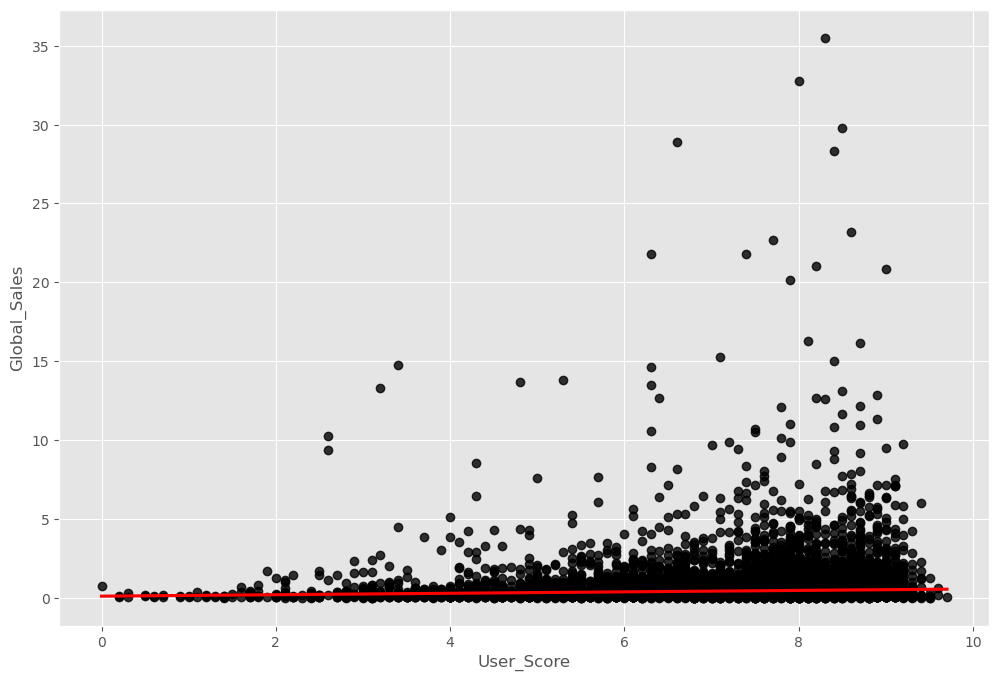

In [20]:
# Leaving the Wii sports outlier out as it adds too much weight regression line. Using robust to de-weight outliers
sns.regplot(x='User_Score', y='Global_Sales',data = df[1:16718],scatter_kws={"color": "black"}, line_kws={"color": "red"}) 

In [91]:
## creating data frame that stores only the quantitative variables for correlation matrix.

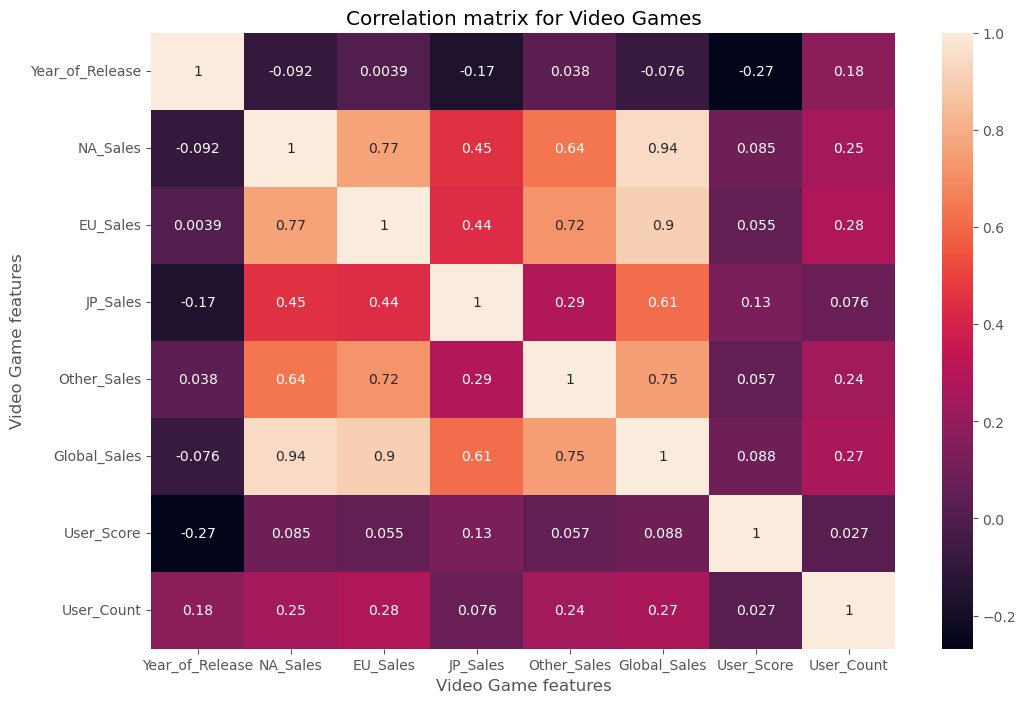

In [25]:
df_quant = df.select_dtypes(include=['int', 'float'])

# Compute the correlation matrix
correlation_matrix= df_quant.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Video Games")

plt.xlabel("Video Game features")

plt.ylabel("Video Game features")

plt.show()

In [29]:
from scipy.stats import f_oneway
# Perform ANOVA test
f_statistic, p_value = f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between sales of the three areas.")


F-statistic: 423.66843499282857
p-value: 3.6998618088620277e-183
Reject the null hypothesis: There is a significant difference between the means.


In [1]:
#checking for normality

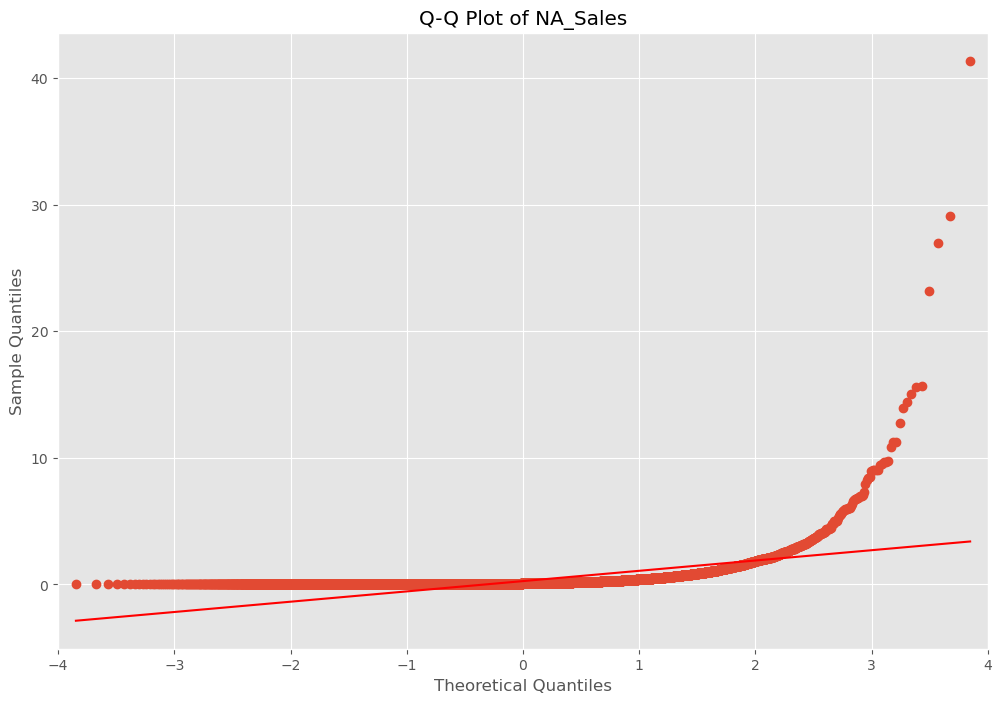

In [40]:
sm.qqplot(df['NA_Sales'], line='s')
plt.title('Q-Q Plot of NA_Sales')
plt.show()

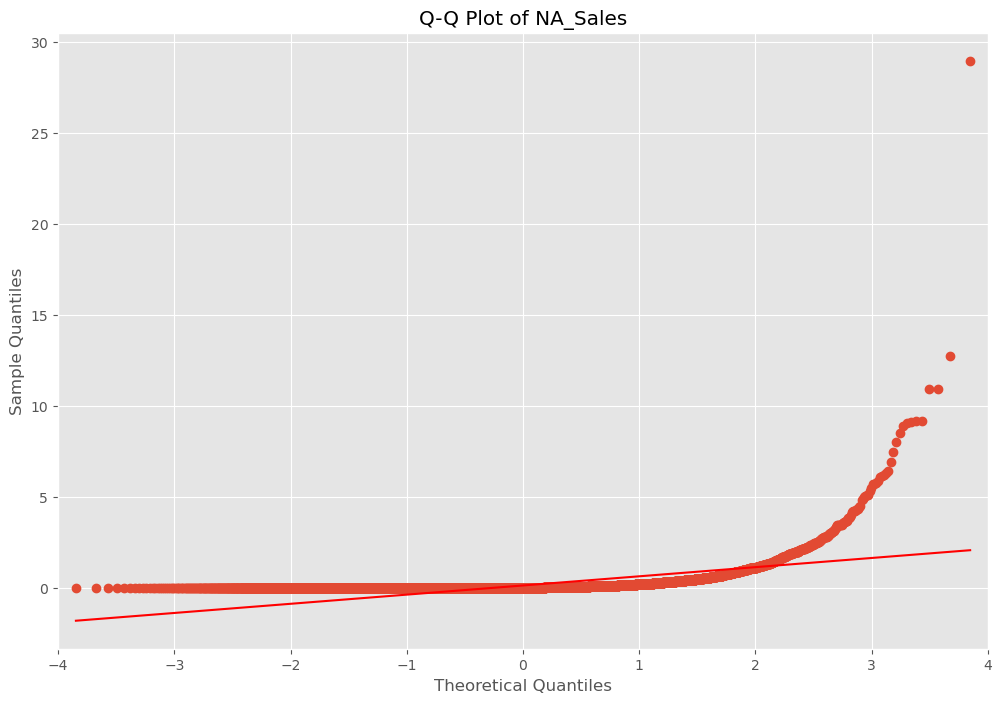

In [41]:
sm.qqplot(df['EU_Sales'], line='s')
plt.title('Q-Q Plot of NA_Sales')
plt.show()

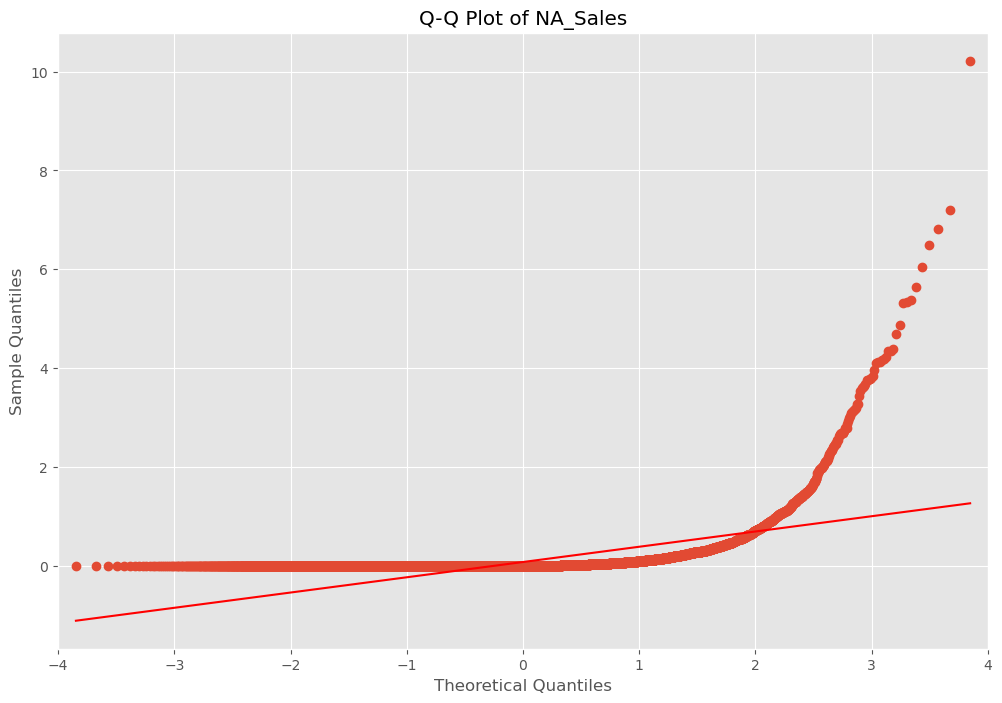

In [42]:
sm.qqplot(df['JP_Sales'], line='s')
plt.title('Q-Q Plot of NA_Sales')
plt.show()

In [3]:

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'])

# Print the results
print("Kruskal-Wallis Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Kruskal-Wallis Test Results:
Test Statistic: 5542.521440059777
p-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.
